# **CHAP8 텍스트 분석**

* NLP : 머신이 인간의 언어를 이해하고 해석하는데 중점
* 텍스트 분석 : 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 중점

* 텍스트 분류, 감성 분석, 텍스트 요약, 텍스트 군집화와 유사도 측정

##**1.텍스트 분석 이해**

텍스트 분석 : 비정형 데이터인 텍스트를 분석하는 것

텍스트를 머신러닝에 적용하기 위해서는 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고 추출된 피처에 의미있는 값을 부여하는가가 중요

피처 벡터화(피처 추출) > BOW, Word2Vec

###1) 텍스트 분석 수행 프로세스

1. 텍스트 사전 준비작업 (텍스트 전처리) : 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수문자 삭제 등의 클렌징 작업, 단어 등의 토큰화 작업, 의미없는 단어 제거 작업, 어근 추출 등의 텍스트 정규화 작업으 수행하는 것을 통칭

2. 피처 벡터화/추출 : 사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터 값을 할당 -> BOW

3. ML모델 쉽 및 학습/예측/평가 : 피처 벡터화된 데이터 세트에 ML모델을 적용해 학습/예측 및 평가를 수행

###2) 파이썬 기반의 NLP, 텍스트 분석 패키지
* NTLK:방대한 데이터 세트와 서브 모듈을 가지고 있으며 NLP의 거의 모든 영역을 커버하고 있음. 수행 속도 측면에서 아쉬운 부분이 있어 샐제 대량의 데이터 기반에서는 제대로 활용 X

* Gensim : 토픽 모델링 분야에서 두각을 나타내는 패키지

* SpaCy : 최근 가장 주목받는 NLP패키지

##**2.텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화**

텍스트 자체를 바로 피처로 만들수는 없음 > 정규화 작업 필요

정규화 : 클렌징, 정제, 토큰화, 어근화 등의 다양한 텍스트 사전 작업

###1) 클렌징

텍스트에서 분석에 오히려 방해가 되는 불필요한 문자, 기호 등으 사전에 제거하는 작업 


###2) 텍스트 토큰화



####(1) 문장 토큰화

문장의 마침표, 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리

send_tokenize() 는 각각의 문장으로 구성된 리스트를 반환

In [ ]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'

sentences = sent_tokenize(text=text_sample) ## sent_tokenize 는 각각의 문장을 담은 list 형태로 반환
print(type(sentences),len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


#####(2) 단어 토큰화

문장을 단어로 토큰화

공백, 콤마, 마침표, 개행문자 등으로 단어를 분리

In [ ]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."

words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [ ]:
from nltk import word_tokenize, sent_tokenize

def tokenize_text(text):
    
    ## 문장 토큰화
    sentences = sent_tokenize(text)
    ## 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]

    return word_tokens

## 문서 입력 및 문장/단어 토큰화 수행
word_tokens = tokenize_text(text_sample)

## 출력
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


문장을 단어별로 하나씩 토큰화 할 경우 문맥적인 의미는 무시됨 > n-gram

n-gram : 연속된 n개의 단어를 하나의 토큰화 단위로 분리

###3) 스톱 워드 제거

스톱워드 : 분석에 큰 의미가 없는 단어 (is, the, a 등)

스톱워드는 빈번하게 등장하는 경우가 많기 때문에 스톱워드를 제거하지 않을 경우 오히려 중요한 단어로 인식될 가능성이 있음

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

for sentence in word_tokens: # 3개의 각 문장을 확인
    filtered_words = []
    
    for word in sentence:
        
        # 대문자 -> 소문자
        word = word.lower()
        
        # 불용어가 아니라면, 리스트에 추가
        if word not in stopwords:
            filtered_words.append(word)
    
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


###4) Stemming 과 Lemmatization

단어의 원형 찾기

Stemming : 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있음

Lemmatization : 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근을 찾아줌

NLTK의 Stemmer : Porter, Lancaster, Snowball Stemmer

NLTK의 Lemmatization : WordNetLemmatizer

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

> amuse의 경우 amus에 ing, s, ed가 붙으므로 amus를 원형으로 인식함

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()

print(lemma.lemmatize('amusing', 'v'),lemma.lemmatize('amuses', 'v'),lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'),lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'),lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


##**3. Bag of Words - BOW**

BOW : 문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델


쉽고 빠른 구축

단점
  * 문맥 의미 반영 부족 : 단어의 순서를 고려하지 않음
  * 희소 행렬 문제 : BOW로 피처 벡터화를 수행하면 희소 행렬 형태의 데이터 세트가 만들어지기 쉬움


###1) BOW 피처 벡터화

ex) 각 문서의 텍스트를 단어로 추출해 피처로 할당하고, 각 단어의 발생 빈도와 같은 값을 피처에 값으로 부여

BOW의 피처 벡터화 : 모든 문서에서 모든 단어를 칼럼 형태로 나여하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것
  * Count 기반의 벡터화 : 단어의 빈도수를 부여
  * TF-IDF 기반의 벡터화 : 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 줌

###2) 사이킷런의 Count 및 TF-IDF 벡터화 구현 : CountVectorizer, TidfVectorizer

파라미터 : max_df, min_df, max_features, stop_words, n_gram_range, analyzer, token_pattern, tokenizer

###3) BOW 벡터화를 위한 희소 행렬

희소 행렬은 너무 많은 불필요한 0 값이 메모리 공간에 할당됨
-> 물리적으로 적은 메모리 공간을 차지하도록 변환 필요

###4) 희소 행렬- COO 형식

0이 아닌 데이터만 별도의 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식

희소 행렬 변환을 위해 사이파이 이용

In [ ]:
import numpy as np

dense = np.array([[3, 0, 1], [0, 2, 0]])

In [ ]:
from scipy import sparse

## 0 이 아닌 데이터 추출
data = np.array([3, 1, 2])

## 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

## sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos))) 

toarray()를 이용해 다시 밀집 형태의 행렬로 출력

In [ ]:
sparse_coo.toarray() 

array([[3, 0, 1],
       [0, 2, 0]])

###5) 희소 해열 - CSR 형식

COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식

행 위치 배열이 0부터 순차적으로 증가하는 값으로 이루어 졌다는 특성을 고려하면 행 위치 배열의 고유한 값의 시작 위치만 표기하는 방법으로 반복 제거 가능(위치의 위치를 표기)

In [ ]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])

In [ ]:
## 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

## 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

## COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

## 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

## CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


* 실제 사용 시에는 다음과 같이 밀집 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 행렬로 생성함

In [ ]:
dense3 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

## **6. 토픽모델링(Topic Modeling) - 20 뉴스그룹**

* 토픽모델링 : 문서 집합에 숨어 있는 주제를 찾아내는 것 

* LSA, LDA

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]

# 위에서 지정한 주제만 추출
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), 
                            categories=cats, random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# LDA는 CountVectorizer만 적용
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)

print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


> CountVectorizer 객체 변수인 feat_vect 모두 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [ ]:
lda.components_

array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

* components_ 속성은 각 토픽별로 word 피처가 해당 토픽에 얼마나 할당되었는지 수치로 나타냄
  * 값이 클수록 해당 word피처는 그 토픽의 중심 word가 됨

In [ ]:
# 각 토픽별로 연관도가 높은 순으로 word를 나열

def display_topics(model, feature_names, no_top_words):
    topic_news20 = ["모토사이클", "야구", "그래픽스", "윈도우즈", "중동", "기독교", "전자공학", "의학"]
    
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index + 1, topic_news20[topic_index])

        # 각 토픽별 word 피처 연관도 내림차순 정렬시 값들의 index 반환 .. (1)
        topic_word_indexes = topic.argsort()[::-1] # [::-1] 역순으로 정렬
        top_indexes = topic_word_indexes[:no_top_words]
        
        # (1)의 index로 피처 이름명 추출
        feature_concat = '/'.join([feature_names[i] for i in top_indexes])                
        
        print(feature_concat)
        print(" ")

In [ ]:
# CountVectorizer 객체의 전체 word 명칭
feature_names = count_vect.get_feature_names()

# Topic별 가장 연관도가 높은 word 15개
display_topics(lda, feature_names, 15)

Topic # 1 모토사이클
year/10/game/medical/health/team/12/20/disease/cancer/1993/games/years/patients/good
 
Topic # 2 야구
don/just/like/know/people/said/think/time/ve/didn/right/going/say/ll/way
 
Topic # 3 그래픽스
image/file/jpeg/program/gif/images/output/format/files/color/entry/00/use/bit/03
 
Topic # 4 윈도우즈
like/know/don/think/use/does/just/good/time/book/read/information/people/used/post
 
Topic # 5 중동
armenian/israel/armenians/jews/turkish/people/israeli/jewish/government/war/dos dos/turkey/arab/armenia/000
 
Topic # 6 기독교
edu/com/available/graphics/ftp/data/pub/motif/mail/widget/software/mit/information/version/sun
 
Topic # 7 전자공학
god/people/jesus/church/believe/christ/does/christian/say/think/christians/bible/faith/sin/life
 
Topic # 8 의학
use/dos/thanks/windows/using/window/does/display/help/like/problem/server/need/know/run
 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


> 그래픽스 분야는 잘 추출됨

> 나머지에서는 애매

## **7.문서 군집화 소개와 실습(Opinion Review 데이터 세트)**

### 1) 문서 군집화 개념
  

* 비슷한 텍스트 구성의 문서를 군집화하는 것
* 텍스트 분류 기반의 문서 분류와 유사
* 텍스트 분류 기반의 문서 분류는 사전에 결정 카테고리 값을 가진 학습 데이터 세트가 필요한데 반해, 문서 군집화는 학습 데이터 세트가 필요없는 비지도학습 기반으로 동작

### 2) Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기

In [ ]:
import pandas as pd
import glob, os

path = r'/content/drive/MyDrive/OpinosisDataset1.0/topics'

all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
  df = pd.read_table(file_, index_col = None, header=0, encoding='latin1')
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,battery-life_ipod_nano_8gb,...
1,battery-life_netbook_1005ha,...
2,bathroom_bestwestern_hotel_sfo,...
3,battery-life_amazon_kindle,...
4,accuracy_garmin_nuvi_255W_gps,...


* TF-IDF 형태로 피처 벡터화
  * Lemmatization을 구현한 LemNormalize() 함수 이용

In [ ]:
import string
import nltk
nltk.download('punkt')
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
  return nltk.word_tokenize(text.lower().translate(remove_punct_dict))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

In [ ]:
from sklearn.cluster import KMeans

km_cluster=KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_

In [ ]:
document_df['cluster_label']=cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,battery-life_ipod_nano_8gb,...,4
1,battery-life_netbook_1005ha,...,4
2,bathroom_bestwestern_hotel_sfo,...,2
3,battery-life_amazon_kindle,...,4
4,accuracy_garmin_nuvi_255W_gps,...,0


* 판다스 DataFrame의 sort_vlaues(by=정렬칼럼명)을 수행하면 인자로 입력된 '정렬칼럼명'으로 데이터를 정렬할 수 있음

In [ ]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
4,accuracy_garmin_nuvi_255W_gps,...,0
50,buttons_amazon_kindle,...,0
49,directions_garmin_nuvi_255W_gps,...,0
46,display_garmin_nuvi_255W_gps,...,0
44,eyesight-issues_amazon_kindle,...,0
41,features_windows7,...,0
40,fonts_amazon_kindle,...,0
25,navigation_amazon_kindle,...,0
29,price_amazon_kindle,...,0
20,satellite_garmin_nuvi_255W_gps,...,0


In [ ]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
48,comfort_honda_accord_2008,...,1
47,comfort_toyota_camry_2007,...,1
43,gas_mileage_toyota_camry_2007,...,1
36,interior_honda_accord_2008,...,1
37,interior_toyota_camry_2007,...,1
22,mileage_honda_accord_2008,...,1
24,performance_honda_accord_2008,...,1
30,quality_toyota_camry_2007,...,1
21,seats_honda_accord_2008,...,1
11,transmission_toyota_camry_2007,...,1


In [ ]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
2,bathroom_bestwestern_hotel_sfo,...,2
45,free_bestwestern_hotel_sfo,...,2
35,location_bestwestern_hotel_sfo,...,2
23,location_holiday_inn_london,...,2
34,parking_bestwestern_hotel_sfo,...,2
26,room_holiday_inn_london,...,2
32,rooms_bestwestern_hotel_sfo,...,2
28,rooms_swissotel_chicago,...,2
9,staff_bestwestern_hotel_sfo,...,2
7,staff_swissotel_chicago,...,2


In [ ]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
42,food_holiday_inn_london,...,3
39,food_swissotel_chicago,...,3
31,price_holiday_inn_london,...,3
16,service_bestwestern_hotel_sfo,...,3
14,service_holiday_inn_london,...,3
15,service_swissotel_hotel_chicago,...,3


In [ ]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
3,battery-life_amazon_kindle,...,4
0,battery-life_ipod_nano_8gb,...,4
1,battery-life_netbook_1005ha,...,4
38,keyboard_netbook_1005ha,...,4
33,performance_netbook_1005ha,...,4
18,screen_ipod_nano_8gb,...,4
27,screen_netbook_1005ha,...,4
13,size_asus_netbook_1005ha,...,4
17,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,4
6,video_ipod_nano_8gb,...,4


In [ ]:
from sklearn.cluster import KMeans

km_cluster=KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_

document_df['cluster_label']=cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
0,battery-life_ipod_nano_8gb,...,0
46,display_garmin_nuvi_255W_gps,...,0
44,eyesight-issues_amazon_kindle,...,0
41,features_windows7,...,0
40,fonts_amazon_kindle,...,0
38,keyboard_netbook_1005ha,...,0
33,performance_netbook_1005ha,...,0
29,price_amazon_kindle,...,0
27,screen_netbook_1005ha,...,0
49,directions_garmin_nuvi_255W_gps,...,0


### 3) 군집별 핵심 단어 추출하기 

* KMeans 객체는 각 군집을 구성하는 단어 피처가 군집의 중심을 기준으로 얼마나 가깝게 위치해있는디 clusters_centers_라는 속성으로 제공함

In [ ]:
clusters_centers=km_cluster.cluster_centers_
print('cluster_centers shape:',cluster_centers.shape)
print(cluster_centers)

cluster_centers shape: (3, 4466)
[[0.01015213 0.0012744  0.         ... 0.00735399 0.         0.        ]
 [0.         0.0009331  0.00337201 ... 0.         0.         0.        ]
 [0.         0.00433978 0.         ... 0.         0.00183257 0.00154897]]


* 각 행의 배열은 각 군집 내의 2409개 피처의 위치가 개별 중심과 얼마나 가까운가를 상대 값으로 나타낸 것
* 1에 가까울수록 중심과 가까운 값을 의미

In [ ]:
def get_cluster_details(cluster_model, cluster_data, feature_names,
                       cluster_num, top_n_features=10):
    cluster_details = {}
    
    centroid_feature_ordered_ind=cluster_model.cluster_centers_.argsort()[:,::-1]

    for cluster_num in range(cluster_num):
      cluster_details[cluster_num]={}
      cluster_details[cluster_num]['cluster']=cluster_num

      top_feature_indexes=centroid_feature_ordered_ind[cluster_num, :top_n_features]
      top_features=[feature_names[ind] for ind in top_feature_indexes]

      top_feature_values=cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

      cluster_details[cluster_num]['top_features']=top_features
      cluster_details[cluster_num]['top_featrues_value']=top_feature_values
      filenames=cluster_data[cluster_data['cluster_label']==cluster_num]['filename']
      filenames=filenames.values.tolist()

      cluster_details[cluster_num]['filenames']=filenames

    return cluster_details


In [ ]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print("#####Cluster {0}".format(cluster_num))
        print("Top features:", cluster_detail['top_features'])
        print("Review 파일명 :",cluster_detail['filenames'][:7])
        print('========================================================================')

In [ ]:
feature_names=tfidf_vect.get_feature_names()

cluster_details=get_cluster_details(cluster_model=km_cluster, cluster_data=document_df, feature_names=feature_names, cluster_num=3, top_n_features=10)

print_cluster_details(cluster_details)

#####Cluster 0
Top features: ['screen', 'battery', 'battery life', 'keyboard', 'life', 'kindle', 'directions', 'size', 'voice', 'video']
Review 파일명 : ['battery-life_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'battery-life_amazon_kindle', 'accuracy_garmin_nuvi_255W_gps', 'voice_garmin_nuvi_255W_gps', 'video_ipod_nano_8gb', 'updates_garmin_nuvi_255W_gps']
#####Cluster 1
Top features: ['interior', 'mileage', 'seats', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Review 파일명 : ['transmission_toyota_camry_2007', 'seats_honda_accord_2008', 'mileage_honda_accord_2008', 'performance_honda_accord_2008', 'quality_toyota_camry_2007', 'interior_honda_accord_2008', 'interior_toyota_camry_2007']
#####Cluster 2
Top features: ['service', 'hotel', 'rooms', 'staff', 'room', 'food', 'location', 'clean', 'bathroom', 'parking']
Review 파일명 : ['bathroom_bestwestern_hotel_sfo', 'staff_swissotel_chicago', 'staff_bestwestern_hotel_sfo', 'service_holiday_inn_london', 's

## **8. 문서 유사도**

### 1) 문서 유사도 측정 방법 - 코사인 유사도

* 벡터간 유사도 비교에 있어 벡터의 크기 보다는 상호 방향성의 유사도에 기반

### 2) 두 벡터 사잇각

* 문서의 유사도 표현에 cosine 사용

* 문서르 피처 벡터화하면 차원이 매우 많은 희소행렬이 되기 쉬웁 -> 문서 간 유사도로 유클리디안 거리를 사용하면 정확도가 떨어짐

* 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이기 때문에 빈도수에만 기반해서는 공정한 비교를 할 수 없음

In [ ]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


> 반환된 행렬은 희소 행렬이므로 밀집 행렬로 변환한 뒤 다시 각각을 배열로 변환

In [ ]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환. 
feature_vect_dense = feature_vect_simple.todense()

#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

#첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2 )
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [ ]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


* 사이킷런 skelarn.metrics.pairwise.cosine_similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)


[[0.40207758 0.40425045]]


In [ ]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)


[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### 3) Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'C:\Users\mimd2\Desktop\ESAA\dataset\OpinosisDataset1.0\OpinosisDataset1.0\topics'
all_files = glob.glob(os.path.join(path, "*.data"))     
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
# print(document_df.head())

from sklearn.feature_extraction.text import TfidfVectorizer

tfodf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfodf_vect.fit_transform(document_df['opinion_text'])
# print(feature_vect)

from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=5, max_iter=1000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

document_df['cluster_label'] = cluster_label

ValueError: ignored

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출 
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]] , feature_vect[hotel_indexes])
print(similarity_pair)

KeyError: ignored

* 첫번째 문서와 다른 문서 간에 유사도가 높은 순으로 정렬하고 시각화

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]
print(sorted_index)

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재 정렬. 
print(hotel_indexes)
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1,)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1,))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)

## **9. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**

### 1) 한글 NLP처리의 어려움

* 띄어쓰기와 조사 때문에 한글 언어 처리가 어려움

### 2) KoNLPy

* 파이썬의 대표적인 한글 형태소 패키지
* C/C++, Java로 만들어진 한글 형태소 엔진을 파이썬 래퍼 기반으로 재작성한 패키지

In [ ]:
import pandas as pd

train_df=pd.read_csv('ratings_train.txt',sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [ ]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [ ]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d 는 숫자를 의미함.) 
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )
train_df.drop('id', axis=1, inplace=True)

# 테스트 데이터 셋을 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )
test_df.drop('id', axis=1, inplace=True)


In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 40.0 MB/s 


In [ ]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

tw_tokenizer('첫째')


/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['첫째']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2) 
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
# Logistic Regression 을 이용하여 감성 분석 Classification 수행. 
lg_clf = LogisticRegression(random_state=0)

# Parameter C 최적화를 위해 GridSearchCV 를 이용. 
params = { 'C': [1 ,3.5, 4.5, 5.5, 10 ] }
grid_cv = GridSearchCV(lg_clf , param_grid=params , cv=3 ,scoring='accuracy', verbose=1 )
grid_cv.fit(tfidf_matrix_train , train_df['label'] )
print(grid_cv.best_params_ , round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 3.5} 0.8593


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용하여 테스트 데이터를 TF-IDF 값으로 Feature 변환함. 
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier 는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ',accuracy_score(test_df['label'],preds))

Logistic Regression 정확도:  0.86186


> 테스트 세트를 이용해 예측할 때는 학습할 때 적용한 TfidfVectorizer를 그대로 사용해야 함

## **10. 텍스트 분석 실습 - 캐글 Mercari Price Suggestion Challenge**

* 일본의 대형 온라인 쇼핑몰인 Mercari 사의 제품에 대해 가격을 예측

https://www.kaggle.com/competitions/mercari-price-suggestion-challenge/data

* features
  * train_id : ID
  * name : 제품명
  * item_condition_id : 판매자가 제공하는 제품 상태
  * category_name : 카테고리 명
  * brand_name : 브랜드 이름
  * price : 제품 가격, 예측을 위한 타깃 속성 => target
  * shipping : 배송비 무료 여부(1이면 무료)
  * item_description :제품에 대한 설명

### 1) 데이터 전처리

In [2]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

mercari_df=pd.read_csv('/content/drive/MyDrive/dataset/mercari_train.tsv', sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [3]:
print(mercari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


* price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


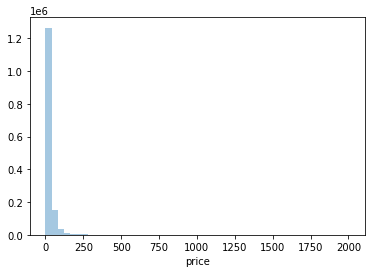

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df=mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df, kde=False)


* 로그변환

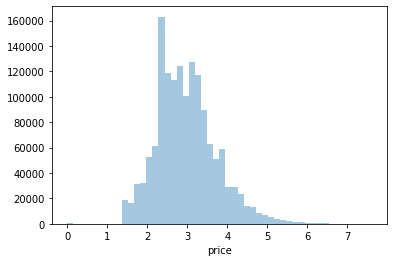

In [5]:
import numpy as np

y_train_df=np.log1p(y_train_df)
sns.distplot(y_train_df, kde=False)

In [6]:
mercari_df['price']=np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

* Shipping

In [7]:
print('Shippin 값 유형:\n', mercari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n', mercari_df['item_condition_id'].value_counts())


Shippin 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [8]:
boolean_cond=mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

* category_name
  * category_name의 '/'를 기준으로 단어를 토큰화해 각각 별도의 피처로 저장하고 이를 이용해 알고리즘을 학습

In [9]:
def split_cat(category_name):
  try:
    return category_name.split('/')
  except:
    return ['Other_Null', 'Other_Null',' Other_Null']

mercari_df['cat_dae'], mercari_df['cat_jung'], mercari_df['cat_so']=\
zip(*mercari_df['category_name'].apply(lambda x: split_cat(x)))

print('대분류 유형 :\n', mercari_df['cat_dae'].value_counts())
print('중분류 개수 :\n', mercari_df['cat_jung'].nunique())
print('소분류 개수 :\n', mercari_df['cat_so'].nunique())

대분류 유형 :
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 개수 :
 114
소분류 개수 :
 871


* brand_name, category_name, item_description 칼럼의 Null 값은 일괄적으로 'Other Null'로 변경

In [10]:
mercari_df['brand_name']=mercari_df['brand_name'].fillna(value='Other_Null')
mercari_df['category_name']=mercari_df['category_name'].fillna(value='Other_Null')
mercari_df['item_description']=mercari_df['item_description'].fillna(value='Other_Null')

mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

### 2) 피처 인코딩과 피처 벡터화

* 문자열 칼럼 중 레이블 또는 원핫 인코딩을 수행하거나 피처 벡터화로 변환할 칼럼 선별
* 회귀 모델 기반
  * 선형 회귀, 회귀 트리

In [11]:
print('brand_name의 유형 건수:', mercari_df['brand_name'].nunique())
print('brand_name sample 5건:\n', mercari_df['brand_name'].value_counts()[:5])

brand_name의 유형 건수: 4810
brand_name sample 5건:
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


> 명료한 문자열이므로 별도의 피처 벡터화 형태로 만들 필요 없음

> 원한인코딩

In [12]:
print('name의 종류 개수 :', mercari_df['name'].nunique())
print('name smaple의 10건 :\n', mercari_df['name'][:10])

name의 종류 개수 : 1225273
name smaple의 10건 :
 0       MLB Cincinnati Reds T Shirt Size XL
1          Razer BlackWidow Chroma Keyboard
2                            AVA-VIV Blouse
3                     Leather Horse Statues
4                      24K GOLD plated rose
5          Bundled items requested for Ruie
6        Acacia pacific tides santorini top
7      Girls cheer and tumbling bundle of 7
8                     Girls Nike Pro shorts
9    Porcelain clown doll checker pants VTG
Name: name, dtype: object


> 종류가 매우 많고 적은 단어 위주의 텍스트 형태로 되어 있으므로 Count기반으로 피처 벡터화 변환 적용

* category_name : 원핫 인코딩

* shipping : 원한 인코딩

* item_condition_id :원한인코딩

* item_description

In [13]:
pd.set_option('max_colwidth',200)

print('item_description 평균 문자열 크기:',mercari_df['item_description'].str.len().mean())

mercari_df['item_description'][:2]

item_description 평균 문자열 크기: 145.7113889385411


0                                                                                                                                                                              No description yet
1    This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work perfectly. The lights are customizable via the Razer Synapse app on your PC.
Name: item_description, dtype: object

> 평균 문자열이 비교적 크므로 TF-IDF 변환

In [14]:
cnt_vec=CountVectorizer()
X_name=cnt_vec.fit_transform(mercari_df.name)

tfidf_descp=TfidfVectorizer(max_features=50000, ngram_range=(1,3), stop_words='english')
X_descp=tfidf_descp.fit_transform(mercari_df['item_description'])

print('name vectorization shape:',X_name.shape)
print('item_description vectorization shpae:', X_descp.shape)

name vectorization shape: (1482535, 105757)
item_description vectorization shpae: (1482535, 50000)


In [15]:
from sklearn.preprocessing import LabelBinarizer

lb_brand_name=LabelBinarizer(sparse_output=True)
X_brand=lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id=LabelBinarizer(sparse_output=True)
X_item_cond_id=lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping=LabelBinarizer(sparse_output=True)
X_shipping=lb_shipping.fit_transform(mercari_df['shipping'])

lb_cat_dae=LabelBinarizer(sparse_output=True)
X_cat_dae=lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung=LabelBinarizer(sparse_output=True)
X_cat_jung=lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so=LabelBinarizer(sparse_output=True)
X_cat_so=lb_cat_so.fit_transform(mercari_df['cat_so'])

In [16]:
print(type(X_brand), type(X_item_cond_id),type(X_shipping))
print('X_brand shape :{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shippping shape :{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape :{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand shape :(1482535, 4810), X_item_cond_id shape:(1482535, 5)
X_shippping shape :(1482535, 1), X_cat_dae shape:(1482535, 11)
X_cat_jung shape :(1482535, 114), X_cat_so shape:(1482535, 871)


In [17]:
import gc
from scipy.sparse import hstack

sparse_matrix_list=(X_name, X_descp, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
X_features_sparse=hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

del X_features_sparse
gc.collect()

<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


0

### 3) 릿지 회귀 모델 구축 및 평가

* 평가 방식은 캐글에서 제시한 RMSE 방식
* 원본 데이터의 price칼럼은 왜곡된 데이터 분포를 가지고 있기 때문에 이를 정규 분포 형태로 유도하기 위해 로그 값을 취해 변환
* 로그로 변환한 수준의 price값을 예측

In [18]:
def rmsle(y,y_pred):
  return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y_pred),2)))

def evaluate_org_price(y_test,preds):
  preds_exmpm=np.expm1(preds)
  y_test_exmpm=np.expm1(y_test)

  rmsle_result=rmsle(y_test_exmpm, preds_exmpm)
  return rmsle_result


In [19]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
  X=hstack(matrix_list).tocsr()
  X_train,X_test,y_train,y_test=train_test_split(X, mercari_df['price'], test_size=0.2, random_state=156)
  model.fit(X_train, y_train)
  preds=model.predict(X_test)
  del X, X_train, X_test, y_train
  gc.collect()

  return preds, y_test

* Ridge를 이용해 회귀 예측
* Item_descriptio 속성의 피처 벡터화 데이터가 포함되지 않았을 때와 포함되었을 때의 예측 성능 비교

In [20]:
linear_model=Ridge(solver='lsqr',fit_intercept=False)
sparse_matrix_list=(X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test=model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle값 :', evaluate_org_price(y_test, linear_preds))
sparse_matrix_list=(X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds, y_test=model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle값 :', evaluate_org_price(y_test, linear_preds))

Item Description을 제외했을 때 rmsle값 : 0.5019223192420288
Item Description을 포함한 rmsle값 : 0.47121931659133187


### 4) LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가

* LightGBM을 이용해 회귀를 수행한 뒤, 위에서 구한 릿지 모델 예측값과 LGBM 모델 예측값을 간단한 앙상블 방식으로 섞어서 최종 회귀 예측값을 평가

* LGBM

In [21]:
from lightgbm import LGBMRegressor

sparse_matrix_list=(X_descp, X_name, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
lgbm_model=LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds, y_test=model_train_predict(model=lgbm_model, matrix_list=sparse_matrix_list)
print('LightGBM rmsle값 :', evaluate_org_price(y_test, lgbm_preds))


LightGBM rmsle값 : 0.4571958024426099


* LGBM+Ridge

In [22]:
preds=lgbm_preds*0.45+linear_preds*0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle값:', evaluate_org_price(y_test, preds))


LightGBM과 Ridge를 ensemble한 최종 rmsle값: 0.45072584092663015


## **11. 정리**


### 1) 텍스트 분석 프로세스

(1) 텍스트 사전 정제 작업 등의 텍스트 정규화 작업

  * 단어 토큰화, 의미없는 단어 필터링, 어근 추출 등 피처 벡터화를 진행하기 이전에 수행하는 다양한 사전 작업
  * 피처 벡터화 : BOW, TF-IDF
    * 문장의 길이가 긴 경우 TF-IDF가 더 적절
(2) 단어 피처 벡터화

(3) 피처 벡터 데이터 세트에 머신러닝 모델을 학습하고 예측, 평가

### 2) 감성 분석

  * 지도학습 기반으로 긍정/부정 이진 분류를 적용한 방식
  * SentiWordNet, VADER과 같은 감성 사전 Lexicon을 이용한 방식

### 3) 토픽 모델링
  * LDA를 이용해 뉴스 그룹 내의 많은 문서들이 공통으로 가지는 토픽을 추출

### 4) 텍스트 군집화
  * K-means

### 5) 텍스트 유사도 측정
   * 코사인 유사도